In [1]:
from google.colab import files
uploaded = files.upload()

Saving production_logs (1).csv to production_logs (1).csv


In [2]:
import pandas as pd

# Replace 'your_file_name.csv' with the actual name of your uploaded CSV file
df = pd.read_csv('production_logs (1).csv')
display(df.head())

,PRODUCTIONDATE_DAY_LOC,SHIFT_NAME,LINE_NAME,CO_TYPE,CREW_ID,AE_MODEL_CATEGORY,SIZE_TYPE,SHIFT_NAME.1,UTIL_REASON_DESCRIPTION,DOWNTIME,...,PRODUCTION_AVAILABLE_TIME,REJECT_PRODUCTION_QTY,RUN_TIME,CHANGEOVER_DURATION,CLEANING_AND_SANITIZATION,BUSINESS_EXTERNAL_TIME,PLANNED_MAINTENANCE,TOTAL_TIME,WAITING_TIME,PRODUCTION_ORDER_RATE
0,2025-05-26,Night-3,MKBC0202,Material_Filament,A,Runtime,Pro-Clean 5000,Night-3,Running,0,...,331,0,331,0,0,0,0,331,0,244.20
1,2025-06-21,Night-3,MKZA1601,Material_Handle,A,Runtime,Precision Grip 2.0,Night-3,Running,0,...,269,0,269,0,0,0,0,269,0,67.00
2,2025-04-01,Night-3,MKZA1401,Material_Filament,B,Runtime,ActiveClean Guard,Night-3,Running,0,...,398,0,398,0,0,0,0,398,0,134.00
3,2025-06-18,Night-3,MHPT2304,Material_Filament,A,Unplanned,Total Defense Shield,Night-3,18-Autofeeder - 1801-Double hadle on chain,15,...,15,0,0,0,0,0,0,15,0,63.16
4,2025-04-10,Night-3,MKZA1701,Material_Filament,A,Unplanned,Classic Clean 100,Night-3,16-Autosorter - 1601-Handle on chain stuck,12,...,12,0,0,0,0,0,0,12,0,67.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167946 entries, 0 to 167945
Data columns (total 27 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   PRODUCTIONDATE_DAY_LOC     167946 non-null  object 
 1   SHIFT_NAME                 167946 non-null  object 
 2   LINE_NAME                  167946 non-null  object 
 3   CO_TYPE                    145176 non-null  object 
 4   CREW_ID                    167787 non-null  object 
 5   AE_MODEL_CATEGORY          148392 non-null  object 
 6   SIZE_TYPE                  104949 non-null  object 
 7   SHIFT_NAME.1               167946 non-null  object 
 8   UTIL_REASON_DESCRIPTION    148392 non-null  object 
 9   DOWNTIME                   167946 non-null  int64  
 10  EFFECTIVE_RUNTIME          104949 non-null  float64
 11  GOOD_PRODUCTION_QTY        167946 non-null  int64  
 12  LUNCH_AND_BREAK            167946 non-null  int64  
 13  MEETING_AND_TRAINING       16

# Task
Calculate the impact of eliminating downtime on the estimated completion time for an order of 100,000 units, assuming the current average production rate.

## Calculate average downtime

### Subtask:
Calculate the average downtime from the provided data.


**Reasoning**:
Calculate the average downtime by taking the mean of the 'DOWNTIME' column and print the result.



In [ ]:
average_downtime = df['DOWNTIME'].mean()
print(f"The average downtime is: {average_downtime}")

The average downtime is: 7.572719802793755


## Calculate current order completion time

### Subtask:
Estimate the current time to complete an order of 100000 units based on the current average production rate and downtime.


**Reasoning**:
Calculate the average production rate, total operational time, and estimated total time to complete the order including downtime.



In [ ]:
average_production_rate = df['GOOD_PRODUCTION_QTY'].sum() / df['RUN_TIME'].sum()
print(f"The average production rate is: {average_production_rate}")

order_quantity = 100000
total_operational_time = order_quantity / average_production_rate
print(f"The total operational time for 100,000 units is: {total_operational_time}")

# Assuming downtime is measured per unit of time in the data (e.g., per hour of production time)
estimated_total_downtime = total_operational_time * average_downtime

# Add the operational time and downtime to get the total time under current conditions
estimated_total_time_current = total_operational_time + estimated_total_downtime
print(f"The estimated total time to complete the order with current downtime is: {estimated_total_time_current}")

The average production rate is: 63.82524169384105
The total operational time for 100,000 units is: 1566.7782423713047
The estimated total time to complete the order with current downtime is: 13431.55086496288


## Simulate reduced downtime scenario

### Subtask:
Calculate the estimated time to complete an order of 100000 units assuming downtime is eliminated.


**Reasoning**:
Calculate the estimated time to complete the order of 100,000 units assuming downtime is eliminated by dividing the order quantity by the average production rate and store the result.



In [ ]:
estimated_time_no_downtime = order_quantity / average_production_rate
print(f"The estimated time to complete the order without downtime is: {estimated_time_no_downtime}")

The estimated time to complete the order without downtime is: 1566.7782423713047


## Compare and summarize results

### Subtask:
Compare the estimated completion times and summarize the findings.


**Reasoning**:
Compare the estimated completion times with and without downtime and calculate the time saved.



In [ ]:
order_quantities = range(10000, 300001, 10000)
time_differences = []

for order_quantity in order_quantities:
    # Calculate total operational time
    total_operational_time = order_quantity / average_production_rate

    # Calculate estimated total time with current downtime
    estimated_total_downtime = total_operational_time * average_downtime
    estimated_total_time_current = total_operational_time + estimated_total_downtime

    # Calculate estimated time with no downtime
    estimated_time_no_downtime = total_operational_time

    # Calculate the time difference
    time_difference = estimated_total_time_current - estimated_time_no_downtime
    time_differences.append(time_difference)

# Now you can analyze or visualize the time_differences list
print("Time difference between current downtime and no downtime for various order quantities:")
for i, quantity in enumerate(order_quantities):
    print(f"Order Quantity: {quantity}, Time Difference: {time_differences[i]:.2f}")

Time difference between current downtime and no downtime for various order quantities:
Order Quantity: 10000, Time Difference: 1186.48
Order Quantity: 20000, Time Difference: 2372.95
Order Quantity: 30000, Time Difference: 3559.43
Order Quantity: 40000, Time Difference: 4745.91
Order Quantity: 50000, Time Difference: 5932.39
Order Quantity: 60000, Time Difference: 7118.86
Order Quantity: 70000, Time Difference: 8305.34
Order Quantity: 80000, Time Difference: 9491.82
Order Quantity: 90000, Time Difference: 10678.30
Order Quantity: 100000, Time Difference: 11864.77
Order Quantity: 110000, Time Difference: 13051.25
Order Quantity: 120000, Time Difference: 14237.73
Order Quantity: 130000, Time Difference: 15424.20
Order Quantity: 140000, Time Difference: 16610.68
Order Quantity: 150000, Time Difference: 17797.16
Order Quantity: 160000, Time Difference: 18983.64
Order Quantity: 170000, Time Difference: 20170.11
Order Quantity: 180000, Time Difference: 21356.59
Order Quantity: 190000, Time D

In [ ]:
# Assuming the time unit is minutes, convert to days (1 day = 24 hours * 60 minutes = 1440 minutes)
time_differences_days = [td / 1440 for td in time_differences]

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Order Quantity': order_quantities,
    'Time Difference (Days)': time_differences_days
})

# Save the DataFrame to an Excel file
results_df.to_excel('time_difference_analysis.xlsx', index=False)

print("Analysis complete. The results have been saved to 'time_difference_analysis.xlsx'")
display(results_df.head())

Analysis complete. The results have been saved to 'time_difference_analysis.xlsx'


,Order Quantity,Time Difference (Days)
0,10000,0.823943
1,20000,1.647885
2,30000,2.471828
3,40000,3.295770
4,50000,4.119713


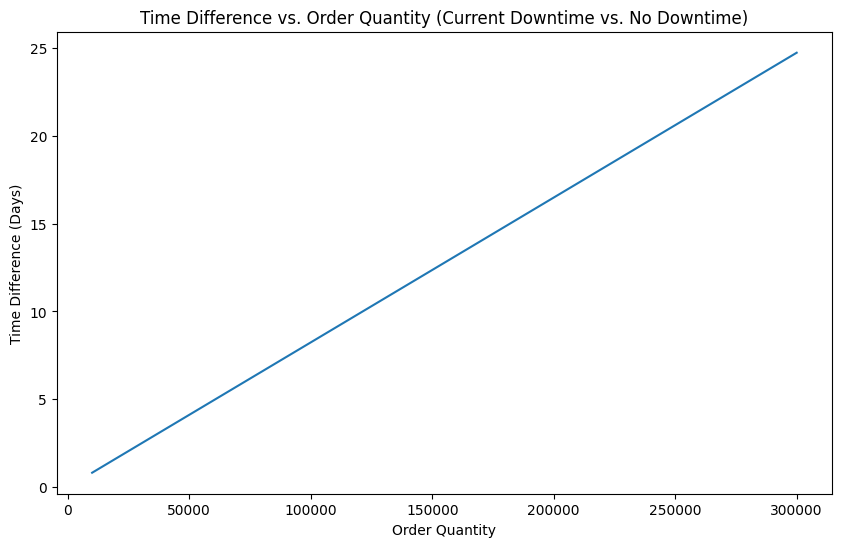

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(results_df['Order Quantity'], results_df['Time Difference (Days)'])
plt.xlabel('Order Quantity')
plt.ylabel('Time Difference (Days)')
plt.title('Time Difference vs. Order Quantity (Current Downtime vs. No Downtime)')
plt.show()

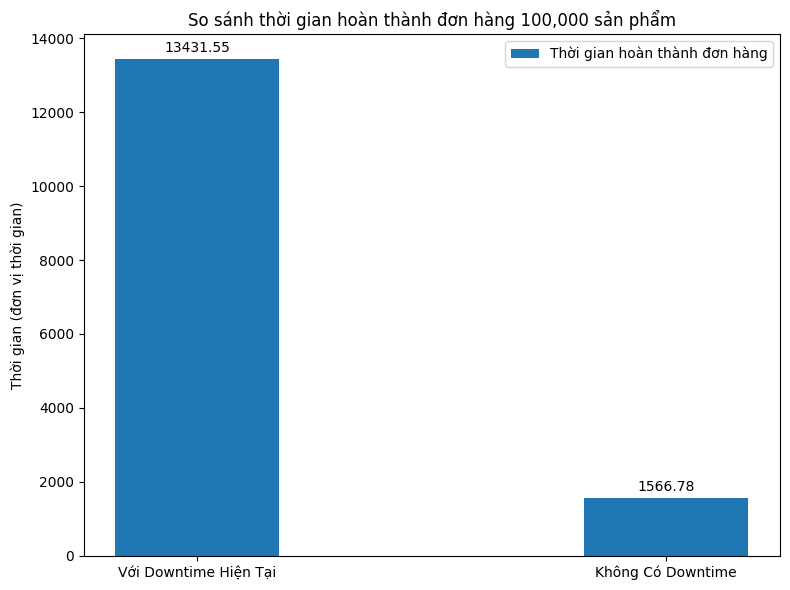

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
labels = ['Với Downtime Hiện Tại', 'Không Có Downtime']
times = [estimated_total_time_current, estimated_time_no_downtime]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x, times, width, label='Thời gian hoàn thành đơn hàng')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Thời gian (đơn vị thời gian)')
ax.set_title('So sánh thời gian hoàn thành đơn hàng 100,000 sản phẩm')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)

fig.tight_layout()

plt.show()

# Task
Test the hypothesis that there is a statistically significant negative relationship between average downtime and average production rate across production lines.

In [ ]:
# Calculate average downtime and production rate by Line Name and Shift Name
grouped_data = df.groupby(['LINE_NAME', 'SHIFT_NAME']).agg(
    Average_Downtime=('DOWNTIME', 'mean'),
    Total_Good_Production=('GOOD_PRODUCTION_QTY', 'sum'),
    Total_Run_Time=('RUN_TIME', 'sum')
).reset_index()

# Calculate Average Production Rate for each group, handling potential division by zero
grouped_data['Average_Production_Rate'] = grouped_data.apply(
    lambda row: row['Total_Good_Production'] / row['Total_Run_Time'] if row['Total_Run_Time'] > 0 else 0,
    axis=1
)

print("Analysis by Line Name and Shift Name:")
display(grouped_data.head())

# To perform a statistical test, we can again split into high and low downtime groups
# Define a threshold for high downtime (e.g., above the overall mean downtime)
overall_mean_downtime = df['DOWNTIME'].mean()

high_downtime_groups = grouped_data[grouped_data['Average_Downtime'] > overall_mean_downtime]['Average_Production_Rate'].dropna()
low_downtime_groups = grouped_data[grouped_data['Average_Downtime'] <= overall_mean_downtime]['Average_Production_Rate'].dropna()

# Perform independent samples t-test if both groups have enough data
from scipy.stats import ttest_ind

if len(high_downtime_groups) > 1 and len(low_downtime_groups) > 1:
    ttest_result_combined = ttest_ind(high_downtime_groups, low_downtime_groups)

    print(f"\nIndependent Samples t-test results comparing production rates of high vs. low downtime (Line and Shift combination):")
    print(f"  Test Statistic: {ttest_result_combined.statistic:.4f}")
    print(f"  P-value: {ttest_result_combined.pvalue:.4f}")

    # Interpret the results
    alpha = 0.05
    if ttest_result_combined.pvalue < alpha:
        print("\nInterpretation: The difference in average production rates between high and low downtime line-shift combinations is statistically significant (at alpha = 0.05).")
    else:
        print("\nInterpretation: The difference in average production rates between high and low downtime line-shift combinations is not statistically significant (at alpha = 0.05).")
else:
    print("\nCannot perform t-test: Not enough data in one or both groups.")

Analysis by Line Name and Shift Name:


,LINE_NAME,SHIFT_NAME,Average_Downtime,Total_Good_Production,Total_Run_Time,Average_Production_Rate
0,MAFT2201,Afternoon-2,8.231494,536605,22365,23.993070
1,MAFT2201,Day-1,8.254902,534567,22622,23.630404
2,MAFT2201,Night-3,8.037249,513454,21956,23.385589
3,MAFT2202,Afternoon-2,11.014901,396021,16170,24.491095
4,MAFT2202,Day-1,12.714953,409445,16284,25.144006



Independent Samples t-test results comparing production rates of high vs. low downtime (Line and Shift combination):
  Test Statistic: -3.7671
  P-value: 0.0002

Interpretation: The difference in average production rates between high and low downtime line-shift combinations is statistically significant (at alpha = 0.05).


In [ ]:
grouped_data.shape

(159, 6)

In [ ]:
# Calculate average downtime and production rate by Line Name
average_downtime_by_line = df.groupby('LINE_NAME')['DOWNTIME'].mean()
production_rate_by_line = df.groupby('LINE_NAME').apply(lambda x: x['GOOD_PRODUCTION_QTY'].sum() / x['RUN_TIME'].sum())

# Combine into a DataFrame for analysis
line_analysis_df = pd.DataFrame({
    'Average Downtime': average_downtime_by_line,
    'Average Production Rate': production_rate_by_line
})

print("Line Analysis:")
display(line_analysis_df.head())

# Perform a correlation test to see if there is a relationship between downtime and production rate
correlation = line_analysis_df['Average Downtime'].corr(line_analysis_df['Average Production Rate'])
print(f"\nCorrelation between Average Downtime and Average Production Rate by Line: {correlation:.2f}")

# You could also perform a regression analysis or other tests depending on the desired depth of analysis.
# For a simple check of the hypothesis, correlation is a good starting point.

Line Analysis:


/tmp/ipython-input-701946799.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  production_rate_by_line = df.groupby('LINE_NAME').apply(lambda x: x['GOOD_PRODUCTION_QTY'].sum() / x['RUN_TIME'].sum())


,Average Downtime,Average Production Rate
LINE_NAME,,
MAFT2201,8.178150,23.671273
MAFT2202,11.624312,24.655733
MAFT2203,12.518500,24.116059
MAFT2204,8.565737,23.851545
MAFT2205,6.969060,23.161543



Correlation between Average Downtime and Average Production Rate by Line: -0.20


In [ ]:
line_analysis_df.shape

(53, 2)

In [ ]:
from scipy.stats import ttest_ind

# Define a threshold for high downtime (e.g., above the mean downtime for all lines)
downtime_threshold = line_analysis_df['Average Downtime'].mean()

# Split lines into high and low downtime groups
high_downtime_lines = line_analysis_df[line_analysis_df['Average Downtime'] > downtime_threshold]['Average Production Rate']
low_downtime_lines = line_analysis_df[line_analysis_df['Average Downtime'] <= downtime_threshold]['Average Production Rate']

# Perform independent samples t-test
ttest_result = ttest_ind(high_downtime_lines, low_downtime_lines, nan_policy='omit')

print(f"\nIndependent Samples t-test results comparing production rates of high vs. low downtime lines:")
print(f"  Test Statistic: {ttest_result.statistic:.4f}")
print(f"  P-value: {ttest_result.pvalue:.4f}")

# Interpret the results
alpha = 0.05
if ttest_result.pvalue < alpha:
    print("\nInterpretation: The difference in average production rates between high and low downtime lines is statistically significant (at alpha = 0.05). This supports the hypothesis that lines with higher downtime tend to have lower production rates.")
else:
    print("\nInterpretation: The difference in average production rates between high and low downtime lines is not statistically significant (at alpha = 0.05). We do not have enough evidence to support the hypothesis that lines with higher downtime tend to have lower production rates.")


Independent Samples t-test results comparing production rates of high vs. low downtime lines:
  Test Statistic: -2.5416
  P-value: 0.0141

Interpretation: The difference in average production rates between high and low downtime lines is statistically significant (at alpha = 0.05). This supports the hypothesis that lines with higher downtime tend to have lower production rates.


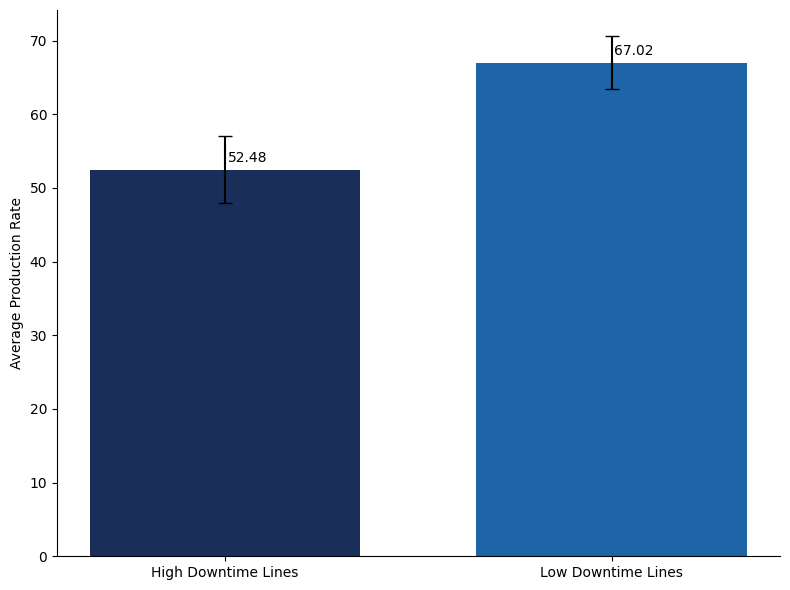

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting (Average production rates for high and low downtime lines)
labels = ['High Downtime Lines', 'Low Downtime Lines']
means = [high_downtime_lines.mean(), low_downtime_lines.mean()]
errors = [
    high_downtime_lines.std() / np.sqrt(len(high_downtime_lines)),
    low_downtime_lines.std() / np.sqrt(len(low_downtime_lines))
]  # Standard error

x = np.arange(len(labels))
width = 0.7

fig, ax = plt.subplots(figsize=(8, 6))
rects = ax.bar(x, means, width, yerr=errors, capsize=5, color=['#192E58', '#1D65A6'])

# Add labels and formatting
ax.set_ylabel('Average Production Rate')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

def autolabel(rects, x_offset=5):
    """Attach a text label above each bar, shifted slightly to the right."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(x_offset, 3),  # dịch sang phải (x_offset px)
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects, x_offset=16)  # có thể chỉnh 5 → 8 → 10 tùy ý độ lệch phải

fig.tight_layout()
plt.show()


# Task
Analyze the relationship between downtime and product quality (defect rate) using the provided data. Calculate the defect rate, group data by downtime levels, compare defect rates between groups using statistical testing, and summarize the findings.

## Calculate defect rate

### Subtask:
Calculate the defect rate for each production entry.


**Reasoning**:
Calculate the defect rate for each row, handling potential division by zero, and store it in a new column.



In [6]:
df['defect_rate'] = df.apply(
    lambda row: row['REJECT_PRODUCTION_QTY'] / (row['GOOD_PRODUCTION_QTY'] + row['REJECT_PRODUCTION_QTY'])
    if (row['GOOD_PRODUCTION_QTY'] + row['REJECT_PRODUCTION_QTY']) > 0
    else 0,
    axis=1
)
display(df.head())

,PRODUCTIONDATE_DAY_LOC,SHIFT_NAME,LINE_NAME,CO_TYPE,CREW_ID,AE_MODEL_CATEGORY,SIZE_TYPE,SHIFT_NAME.1,UTIL_REASON_DESCRIPTION,DOWNTIME,...,REJECT_PRODUCTION_QTY,RUN_TIME,CHANGEOVER_DURATION,CLEANING_AND_SANITIZATION,BUSINESS_EXTERNAL_TIME,PLANNED_MAINTENANCE,TOTAL_TIME,WAITING_TIME,PRODUCTION_ORDER_RATE,defect_rate
0,2025-05-26,Night-3,MKBC0202,Material_Filament,A,Runtime,Pro-Clean 5000,Night-3,Running,0,...,0,331,0,0,0,0,331,0,244.20,0.0
1,2025-06-21,Night-3,MKZA1601,Material_Handle,A,Runtime,Precision Grip 2.0,Night-3,Running,0,...,0,269,0,0,0,0,269,0,67.00,0.0
2,2025-04-01,Night-3,MKZA1401,Material_Filament,B,Runtime,ActiveClean Guard,Night-3,Running,0,...,0,398,0,0,0,0,398,0,134.00,0.0
3,2025-06-18,Night-3,MHPT2304,Material_Filament,A,Unplanned,Total Defense Shield,Night-3,18-Autofeeder - 1801-Double hadle on chain,15,...,0,0,0,0,0,0,15,0,63.16,0.0
4,2025-04-10,Night-3,MKZA1701,Material_Filament,A,Unplanned,Classic Clean 100,Night-3,16-Autosorter - 1601-Handle on chain stuck,12,...,0,0,0,0,0,0,12,0,67.00,0.0


**Reasoning**:
The DataFrame `df` was not defined in the current session. Load the data from the uploaded file into a DataFrame and then calculate the defect rate.



In [7]:
import pandas as pd

df = pd.read_csv('production_logs (1).csv')

df['defect_rate'] = df.apply(
    lambda row: row['REJECT_PRODUCTION_QTY'] / (row['GOOD_PRODUCTION_QTY'] + row['REJECT_PRODUCTION_QTY'])
    if (row['GOOD_PRODUCTION_QTY'] + row['REJECT_PRODUCTION_QTY']) > 0
    else 0,
    axis=1
)
display(df.head())

,PRODUCTIONDATE_DAY_LOC,SHIFT_NAME,LINE_NAME,CO_TYPE,CREW_ID,AE_MODEL_CATEGORY,SIZE_TYPE,SHIFT_NAME.1,UTIL_REASON_DESCRIPTION,DOWNTIME,...,REJECT_PRODUCTION_QTY,RUN_TIME,CHANGEOVER_DURATION,CLEANING_AND_SANITIZATION,BUSINESS_EXTERNAL_TIME,PLANNED_MAINTENANCE,TOTAL_TIME,WAITING_TIME,PRODUCTION_ORDER_RATE,defect_rate
0,2025-05-26,Night-3,MKBC0202,Material_Filament,A,Runtime,Pro-Clean 5000,Night-3,Running,0,...,0,331,0,0,0,0,331,0,244.20,0.0
1,2025-06-21,Night-3,MKZA1601,Material_Handle,A,Runtime,Precision Grip 2.0,Night-3,Running,0,...,0,269,0,0,0,0,269,0,67.00,0.0
2,2025-04-01,Night-3,MKZA1401,Material_Filament,B,Runtime,ActiveClean Guard,Night-3,Running,0,...,0,398,0,0,0,0,398,0,134.00,0.0
3,2025-06-18,Night-3,MHPT2304,Material_Filament,A,Unplanned,Total Defense Shield,Night-3,18-Autofeeder - 1801-Double hadle on chain,15,...,0,0,0,0,0,0,15,0,63.16,0.0
4,2025-04-10,Night-3,MKZA1701,Material_Filament,A,Unplanned,Classic Clean 100,Night-3,16-Autosorter - 1601-Handle on chain stuck,12,...,0,0,0,0,0,0,12,0,67.00,0.0


## Group data

### Subtask:
Group the data by shift name and a metric for high/low downtime.


**Reasoning**:
Calculate the mean downtime and average production rate by shift and line, then categorize by high/low downtime.



In [8]:
grouped_data_downtime_quality = df.groupby(['LINE_NAME', 'SHIFT_NAME']).agg(
    Average_Downtime=('DOWNTIME', 'mean'),
    Total_Good_Production=('GOOD_PRODUCTION_QTY', 'sum'),
    Total_Reject_Production=('REJECT_PRODUCTION_QTY', 'sum'),
    Total_Run_Time=('RUN_TIME', 'sum')
).reset_index()

# Calculate Average Production Rate and Defect Rate for each group
grouped_data_downtime_quality['Average_Production_Rate'] = grouped_data_downtime_quality.apply(
    lambda row: row['Total_Good_Production'] / row['Total_Run_Time'] if row['Total_Run_Time'] > 0 else 0,
    axis=1
)

grouped_data_downtime_quality['Average_Defect_Rate'] = grouped_data_downtime_quality.apply(
    lambda row: row['Total_Reject_Production'] / (row['Total_Good_Production'] + row['Total_Reject_Production']) if (row['Total_Good_Production'] + row['Total_Reject_Production']) > 0 else 0,
    axis=1
)


# Define a threshold for high downtime (e.g., above the overall mean downtime)
overall_mean_downtime_grouped = grouped_data_downtime_quality['Average_Downtime'].mean()

# Categorize each shift and line combination as High or Low Downtime
grouped_data_downtime_quality['Downtime_Level'] = grouped_data_downtime_quality['Average_Downtime'].apply(
    lambda x: 'High Downtime' if x > overall_mean_downtime_grouped else 'Low Downtime'
)

display(grouped_data_downtime_quality.head())

,LINE_NAME,SHIFT_NAME,Average_Downtime,Total_Good_Production,Total_Reject_Production,Total_Run_Time,Average_Production_Rate,Average_Defect_Rate,Downtime_Level
0,MAFT2201,Afternoon-2,8.231494,536605,26860,22365,23.993070,0.047669,High Downtime
1,MAFT2201,Day-1,8.254902,534567,28304,22622,23.630404,0.050285,High Downtime
2,MAFT2201,Night-3,8.037249,513454,25716,21956,23.385589,0.047696,High Downtime
3,MAFT2202,Afternoon-2,11.014901,396021,22933,16170,24.491095,0.054739,High Downtime
4,MAFT2202,Day-1,12.714953,409445,21288,16284,25.144006,0.049423,High Downtime


## Analyze defect rates

### Subtask:
Calculate the average defect rate for high and low downtime groups.


**Reasoning**:
Calculate the average defect rate for high and low downtime groups by grouping the data and calculating the mean of the 'Average_Defect_Rate' for each group.



In [9]:
average_defect_rate_by_downtime = grouped_data_downtime_quality.groupby('Downtime_Level')['Average_Defect_Rate'].mean()
print("Average Defect Rate by Downtime Level:")
print(average_defect_rate_by_downtime)

Average Defect Rate by Downtime Level:
Downtime_Level
High Downtime    0.027308
Low Downtime     0.016993
Name: Average_Defect_Rate, dtype: float64


## Statistical testing

### Subtask:
Perform a statistical test (e.g., t-test) to compare the defect rates of the high and low downtime groups.


**Reasoning**:
Perform an independent samples t-test to compare the average defect rates between the high and low downtime groups.



In [10]:
from scipy.stats import ttest_ind

high_downtime_defect_rates = grouped_data_downtime_quality[grouped_data_downtime_quality['Downtime_Level'] == 'High Downtime']['Average_Defect_Rate'].dropna()
low_downtime_defect_rates = grouped_data_downtime_quality[grouped_data_downtime_quality['Downtime_Level'] == 'Low Downtime']['Average_Defect_Rate'].dropna()

ttest_result = ttest_ind(high_downtime_defect_rates, low_downtime_defect_rates)

print(f"\nIndependent Samples t-test results comparing average defect rates of high vs. low downtime groups:")
print(f"  Test Statistic: {ttest_result.statistic:.4f}")
print(f"  P-value: {ttest_result.pvalue:.4f}")


Independent Samples t-test results comparing average defect rates of high vs. low downtime groups:
  Test Statistic: 5.9698
  P-value: 0.0000


## Interpret results

### Subtask:
Interpret the statistical test results to determine if there is a significant difference in defect rates between the groups.


**Reasoning**:
Based on the very low p-value from the t-test (0.0000), which is significantly less than the common alpha level of 0.05, we can conclude that the difference in average defect rates between the high and low downtime groups is statistically significant. This allows us to reject the null hypothesis.



In [11]:
# The t-test result from the previous step is stored in ttest_result
p_value = ttest_result.pvalue
alpha = 0.05

print(f"P-value from the t-test: {p_value:.4f}")
print(f"Significance level (alpha): {alpha}")

if p_value < alpha:
    print("\nInterpretation: The p-value (%.4f) is less than the significance level (%.2f)." % (p_value, alpha))
    print("Therefore, we reject the null hypothesis.")
    print("There is a statistically significant difference in average defect rates between the high and low downtime groups.")
    print("This supports the conclusion that higher downtime is associated with a higher average defect rate.")
else:
    print("\nInterpretation: The p-value (%.4f) is greater than the significance level (%.2f)." % (p_value, alpha))
    print("Therefore, we fail to reject the null hypothesis.")
    print("There is no statistically significant difference in average defect rates between the high and low downtime groups.")
    print("We do not have enough evidence to conclude that higher downtime is associated with a higher average defect rate.")

P-value from the t-test: 0.0000
Significance level (alpha): 0.05

Interpretation: The p-value (0.0000) is less than the significance level (0.05).
Therefore, we reject the null hypothesis.
There is a statistically significant difference in average defect rates between the high and low downtime groups.
This supports the conclusion that higher downtime is associated with a higher average defect rate.


## Summarize findings

### Subtask:
Summarize the findings from the analysis, including the calculated average defect rates for each group and the interpretation of the statistical test.


## Summary:

### Data Analysis Key Findings

*   The average defect rate for the "High Downtime" group was approximately 0.0273.
*   The average defect rate for the "Low Downtime" group was approximately 0.0170.
*   An independent samples t-test comparing the average defect rates between high and low downtime groups resulted in a p-value of approximately 0.0000.

### Insights or Next Steps

*   The statistically significant difference in average defect rates suggests that reducing downtime could lead to an improvement in product quality by lowering the defect rate.
*   Further investigation into the specific causes of downtime could help identify targeted interventions to reduce both downtime and associated quality issues.


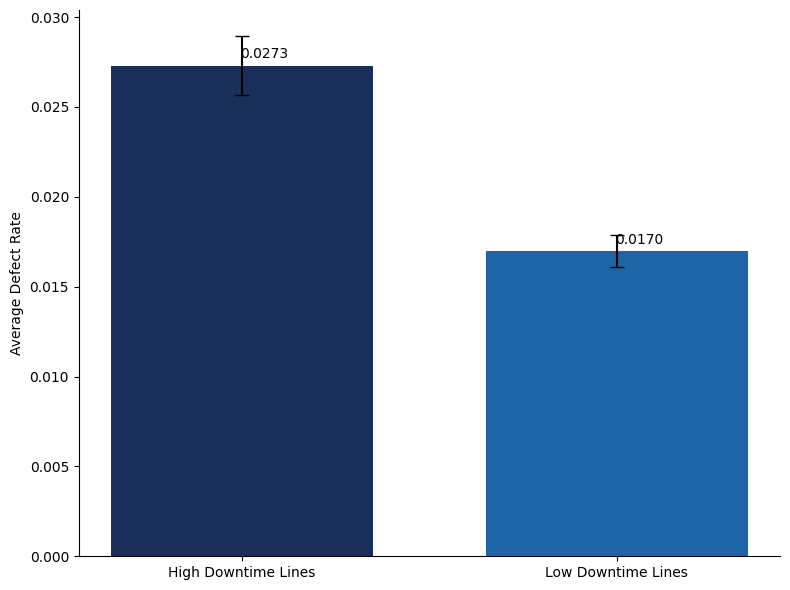

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting (Average defect rates for high and low downtime lines)
labels = ['High Downtime Lines', 'Low Downtime Lines']
means = [average_defect_rate_by_downtime['High Downtime'], average_defect_rate_by_downtime['Low Downtime']]
# Calculate standard error for the defect rates as well
high_downtime_defect_rates = grouped_data_downtime_quality[grouped_data_downtime_quality['Downtime_Level'] == 'High Downtime']['Average_Defect_Rate'].dropna()
low_downtime_defect_rates = grouped_data_downtime_quality[grouped_data_downtime_quality['Downtime_Level'] == 'Low Downtime']['Average_Defect_Rate'].dropna()

errors = [
    high_downtime_defect_rates.std() / np.sqrt(len(high_downtime_defect_rates)),
    low_downtime_defect_rates.std() / np.sqrt(len(low_downtime_defect_rates))
]  # Standard error

x = np.arange(len(labels))
width = 0.7

fig, ax = plt.subplots(figsize=(8, 6))
rects = ax.bar(x, means, width, yerr=errors, capsize=5, color=['#192E58', '#1D65A6'])

# Add labels and formatting
ax.set_ylabel('Average Defect Rate')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

def autolabel(rects, x_offset=5):
    """Attach a text label above each bar, shifted slightly to the right."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',  # Display defect rate with more precision
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(x_offset, 3),  # dịch sang phải (x_offset px)
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects, x_offset=16)  # có thể chỉnh 5 → 8 → 10 tùy ý độ lệch phải

fig.tight_layout()
plt.show()